In [79]:
import pandas as pd
import numpy  as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [80]:
import numpy as np
# from keras.models import  Sequential
# from keras.layers import Dense, Flatten, Activation, Dropout
# from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.image import RecurrencePlot
from pyts.image import MarkovTransitionField
from pyts.datasets import load_gunpoint
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [81]:
# %%time
# %run data_generate.ipynb

Wall time: 11.2 s


(3035, 17)

(3035, 3)

(48576, 9)

3036.0

Wall time: 22 s


(3035, 4)

(3036, 17)

(3034, 20)

(3034, 20)

(3034, 20)

'df_merg'

,Date,Time,return,return_pm,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2006-01-24,1900-01-01 12:45:00,4.005081,1,219.399994,219.610001,219.490005,220.000000,218.960007,218.889999,220.380005,220.490005,220.440002,220.500000,220.199997,219.800003,220.250000,220.449997,220.500000,220.470001
1,2006-01-25,1900-01-01 12:45:00,0.705781,1,222.449997,222.869995,222.899994,223.000000,223.889999,224.000000,229.300003,229.000000,229.550003,228.800003,227.880005,227.869995,226.110001,226.600006,227.210007,226.699997
2,2006-01-26,1900-01-01 12:45:00,-0.916270,0,228.500000,228.600006,228.449997,228.770004,228.699997,228.380005,228.300003,228.500000,227.800003,227.600006,227.789993,227.550003,227.880005,227.789993,228.000000,228.100006
3,2006-01-27,1900-01-01 12:45:00,2.561247,1,224.500000,225.500000,225.160004,225.389999,225.160004,224.470001,226.009995,225.300003,225.839996,225.710007,225.710007,225.600006,225.800003,225.399994,225.550003,224.500000
4,2006-01-30,1900-01-01 12:45:00,-2.971174,0,227.899994,227.399994,227.449997,227.500000,227.729996,228.750000,230.250000,228.839996,228.500000,228.750000,228.300003,227.460007,228.000000,227.279999,225.350006,225.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,2018-04-03,1900-01-01 12:45:00,0.577086,1,140.600006,141.360001,140.910004,140.320007,140.860001,140.649994,140.240005,140.080002,140.240005,140.429993,140.470001,140.559998,140.490005,140.589996,140.539993,140.360001
3030,2018-04-04,1900-01-01 12:45:00,0.858551,1,140.699997,140.610001,140.660004,141.130005,140.669998,140.869995,141.169998,140.419998,140.229996,140.399994,140.259995,140.169998,139.520004,139.470001,139.529999,139.770004
3031,2018-04-05,1900-01-01 12:45:00,0.071117,1,139.740005,140.070007,140.190002,140.179993,141.199997,141.139999,140.970001,140.949997,140.910004,140.720001,140.580002,140.639999,140.720001,140.589996,140.839996,140.600006
3032,2018-04-06,1900-01-01 12:45:00,-4.466555,0,140.610001,140.309998,140.250000,140.500000,140.139999,140.509995,140.699997,140.679993,140.979996,140.839996,141.220001,141.070007,141.330002,141.740005,141.509995,141.720001


Wall time: 45 ms
Wall time: 33.4 s


In [103]:
# # %%time

# #хотим цикл чтобы все были
# #%run dg_sycle.ipynb:

# %run def_data_generate.ipynb
# all_stock = pd.DataFrame()
# for ii in ['GAZP', 'LKOH', 'SBER', 'ROSN', 'VTBR', 'GMKN']:
#     df_merg = gen_cycle(ii)
#     all_stock = all_stock.append(df_merg)

# #ПЕРЕХОДНИК
# df_merg = all_stock 
# #СОРТИРОВКА?
# df_merg.sort_values(by = 'Date', ascending=True, inplace=True)
# df_merg

(3035, 17)

(3035, 3)

(48576, 9)

3036.0

(3035, 4)

(3036, 17)

(3034, 21)

(3034, 21)

(3034, 21)

'df_merg'

,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
0,2006-01-24,1900-01-01 12:45:00,4.005081,1,219.399994,219.610001,219.490005,220.000000,218.960007,218.889999,...,220.490005,220.440002,220.500000,220.199997,219.800003,220.250000,220.449997,220.500000,220.470001,GAZP
1,2006-01-25,1900-01-01 12:45:00,0.705781,1,222.449997,222.869995,222.899994,223.000000,223.889999,224.000000,...,229.000000,229.550003,228.800003,227.880005,227.869995,226.110001,226.600006,227.210007,226.699997,GAZP
2,2006-01-26,1900-01-01 12:45:00,-0.916270,0,228.500000,228.600006,228.449997,228.770004,228.699997,228.380005,...,228.500000,227.800003,227.600006,227.789993,227.550003,227.880005,227.789993,228.000000,228.100006,GAZP
3,2006-01-27,1900-01-01 12:45:00,2.561247,1,224.500000,225.500000,225.160004,225.389999,225.160004,224.470001,...,225.300003,225.839996,225.710007,225.710007,225.600006,225.800003,225.399994,225.550003,224.500000,GAZP
4,2006-01-30,1900-01-01 12:45:00,-2.971174,0,227.899994,227.399994,227.449997,227.500000,227.729996,228.750000,...,228.839996,228.500000,228.750000,228.300003,227.460007,228.000000,227.279999,225.350006,225.500000,GAZP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,2018-04-03,1900-01-01 12:45:00,0.577086,1,140.600006,141.360001,140.910004,140.320007,140.860001,140.649994,...,140.080002,140.240005,140.429993,140.470001,140.559998,140.490005,140.589996,140.539993,140.360001,GAZP
3030,2018-04-04,1900-01-01 12:45:00,0.858551,1,140.699997,140.610001,140.660004,141.130005,140.669998,140.869995,...,140.419998,140.229996,140.399994,140.259995,140.169998,139.520004,139.470001,139.529999,139.770004,GAZP
3031,2018-04-05,1900-01-01 12:45:00,0.071117,1,139.740005,140.070007,140.190002,140.179993,141.199997,141.139999,...,140.949997,140.910004,140.720001,140.580002,140.639999,140.720001,140.589996,140.839996,140.600006,GAZP
3032,2018-04-06,1900-01-01 12:45:00,-4.466555,0,140.610001,140.309998,140.250000,140.500000,140.139999,140.509995,...,140.679993,140.979996,140.839996,141.220001,141.070007,141.330002,141.740005,141.509995,141.720001,GAZP


(3049, 17)

(3049, 3)

(48784, 9)

3049.0

(3049, 4)

(3049, 17)

(3048, 21)

(3048, 21)

(3048, 21)

'df_merg'

,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
0,2006-01-11,1900-01-01 12:45:00,1.508612,1,1810.000000,1808.000000,1810.000000,1809.010010,1810.109985,1811.989990,...,1803.0,1806.040039,1807.099976,1804.989990,1804.50000,1809.199951,1814.000000,1820.000000,1819.550049,LKOH
1,2006-01-12,1900-01-01 12:45:00,2.313072,1,1821.510010,1819.050049,1818.199951,1820.109985,1824.989990,1820.969971,...,1844.0,1842.699951,1840.000000,1841.949951,1847.00000,1850.000000,1856.500000,1855.619995,1859.000000,LKOH
2,2006-01-13,1900-01-01 12:45:00,1.403372,1,1897.849976,1883.000000,1888.000000,1894.319946,1900.000000,1901.890015,...,1897.0,1882.000000,1888.000000,1891.000000,1888.00000,1923.079956,1921.300049,1907.040039,1916.099976,LKOH
3,2006-01-16,1900-01-01 12:45:00,5.439783,1,1902.000000,1908.000000,1910.500000,1914.400024,1913.989990,1919.819946,...,1955.0,1971.000000,1968.869995,1970.800049,1979.50000,1970.000000,1970.000000,1972.300049,1972.689941,LKOH
4,2006-01-17,1900-01-01 12:45:00,0.198413,1,2004.300049,2017.930054,2027.000000,2031.000000,2028.500000,2039.989990,...,2076.0,2068.000000,2040.000000,2045.579956,2025.01001,2024.000000,2022.780029,2010.000000,2016.000000,LKOH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,2018-04-03,1900-01-01 12:45:00,0.955536,1,3971.500000,3976.000000,3973.500000,3955.500000,3970.000000,3962.000000,...,3942.0,3937.000000,3943.500000,3946.500000,3937.00000,3937.000000,3939.000000,3937.500000,3924.500000,LKOH
3044,2018-04-04,1900-01-01 12:45:00,0.647290,1,3943.000000,3942.500000,3938.500000,3951.000000,3943.500000,3955.000000,...,3956.5,3959.000000,3963.500000,3962.500000,3958.50000,3942.000000,3950.000000,3948.000000,3939.500000,LKOH
3045,2018-04-05,1900-01-01 12:45:00,-0.491803,0,3928.500000,3934.000000,3940.000000,3939.000000,3956.500000,3961.000000,...,3962.0,3957.500000,3960.000000,3960.000000,3952.00000,3958.500000,3960.000000,3963.500000,3965.000000,LKOH
3046,2018-04-06,1900-01-01 12:45:00,-4.070282,0,3975.000000,3975.500000,3972.500000,3990.000000,3952.500000,3954.000000,...,3937.5,3942.500000,3941.500000,3945.000000,3946.00000,3950.000000,3950.000000,3952.000000,3955.500000,LKOH


(3033, 17)

(3033, 3)

(48544, 9)

3034.0

(3033, 4)

(3034, 17)

(3032, 21)

(3032, 21)

(3032, 21)

'df_merg'

,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
0,2006-01-11,1900-01-01 12:45:00,7.138967,1,40454.011720,40500.000000,40599.000000,40530.089840,40490.000000,40080.000000,...,40200.000000,40350.000000,40520.000000,40400.000000,40411.011720,40599.011720,40943.968750,40889.000000,40918.800780,SBER
1,2006-01-12,1900-01-01 12:45:00,7.957085,1,41777.000000,41675.000000,41800.000000,41999.968750,42100.000000,42100.000000,...,44250.000000,43439.000000,43739.980470,44097.988280,44325.019530,44170.000000,44800.000000,44920.000000,44740.000000,SBER
2,2006-01-13,1900-01-01 12:45:00,-2.060738,0,45600.000000,45900.000000,47200.000000,48298.980470,48095.000000,47503.000000,...,48400.000000,45700.000000,47150.000000,46700.000000,46693.660160,46849.949220,46770.000000,46620.000000,46100.000000,SBER
3,2006-01-16,1900-01-01 12:45:00,-0.675302,0,45500.031250,45500.000000,45453.011720,45550.000000,45449.941410,45510.000000,...,46000.000000,45860.000000,46119.000000,46369.980470,46399.000000,46140.000000,45850.000000,45990.000000,45910.031250,SBER
4,2006-01-17,1900-01-01 12:45:00,-5.450797,0,45231.019530,45205.050780,45490.898440,45758.000000,45701.019530,45830.000000,...,45151.000000,44799.949220,44466.000000,44240.000000,43915.000000,43911.000000,44000.000000,43950.000000,44104.000000,SBER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,2018-04-03,1900-01-01 12:45:00,2.911831,1,251.619995,251.970001,250.649994,249.990005,249.960007,250.940002,...,246.949997,246.259995,246.880005,247.460007,247.750000,248.529999,247.919998,246.979996,246.580002,SBER
3028,2018-04-04,1900-01-01 12:45:00,2.621509,1,251.100006,250.809998,251.039993,251.600006,252.809998,253.149994,...,252.210007,252.259995,253.139999,252.789993,251.919998,250.509995,250.919998,250.389999,251.000000,SBER
3029,2018-04-05,1900-01-01 12:45:00,0.435896,1,254.270004,255.470001,255.690002,255.690002,257.510010,257.440002,...,257.570007,256.890015,256.019989,256.540008,256.769989,256.739990,257.420013,259.119995,259.230011,SBER
3030,2018-04-06,1900-01-01 12:45:00,-6.701944,0,261.720001,261.670013,261.730011,262.000000,260.709992,260.589996,...,260.070007,261.239990,261.239990,262.109985,261.700012,260.750000,260.190002,259.600006,260.820007,SBER


(2910, 17)

(2910, 3)

(46592, 9)

2912.0

(2910, 4)

(2912, 17)

(2910, 21)

(2910, 21)

(2910, 21)

'df_merg'

,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
0,2006-07-20,1900-01-01 12:45:00,-0.587658,0,203.889999,203.750000,203.500000,203.910004,203.789993,203.949997,...,204.500000,204.500000,204.460007,204.800003,204.649994,204.690002,204.649994,204.500000,204.199997,ROSN
1,2006-07-21,1900-01-01 12:45:00,-0.441928,0,203.500000,203.500000,203.500000,203.300003,203.240005,203.259995,...,202.899994,202.949997,202.649994,202.399994,202.000000,201.500000,200.800003,201.000000,201.389999,ROSN
2,2006-07-24,1900-01-01 12:45:00,0.173571,1,200.800003,201.000000,200.500000,200.550003,200.899994,202.000000,...,199.259995,200.990005,200.970001,201.750000,201.570007,201.369995,201.699997,201.470001,201.649994,ROSN
3,2006-07-25,1900-01-01 12:45:00,0.330896,1,201.610001,202.000000,201.770004,202.000000,201.979996,201.990005,...,202.699997,202.449997,202.300003,202.000000,202.250000,202.000000,202.300003,201.899994,202.479996,ROSN
4,2006-07-26,1900-01-01 12:45:00,-0.147712,0,202.750000,202.919998,202.699997,202.429993,202.500000,202.690002,...,202.990005,202.949997,202.300003,202.500000,202.850006,203.000000,203.000000,202.800003,203.100006,ROSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,2018-04-03,1900-01-01 12:45:00,1.619115,1,311.250000,311.049988,310.000000,309.049988,311.200012,310.200012,...,309.850006,310.399994,312.899994,312.950012,313.250000,312.600006,313.149994,313.100006,311.899994,ROSN
2906,2018-04-04,1900-01-01 12:45:00,1.660604,1,313.000000,313.350006,313.100006,313.250000,313.799988,315.299988,...,315.950012,315.000000,315.500000,316.950012,316.299988,316.000000,316.149994,315.899994,316.149994,ROSN
2907,2018-04-05,1900-01-01 12:45:00,-0.975683,0,319.049988,319.350006,319.799988,319.600006,322.149994,321.399994,...,321.649994,322.850006,322.000000,321.799988,322.200012,321.500000,321.549988,321.799988,322.850006,ROSN
2908,2018-04-06,1900-01-01 12:45:00,-4.623561,0,323.149994,323.299988,323.450012,322.649994,321.100006,320.200012,...,320.549988,320.500000,319.950012,320.250000,319.799988,320.049988,320.000000,319.899994,320.100006,ROSN


(2705, 17)

(2705, 3)

(43296, 9)

2706.0

(2705, 4)

(2706, 17)

(2704, 21)

(2704, 21)

(2704, 21)

'df_merg'

,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
0,2007-05-29,1900-01-01 12:45:00,-3.098591,0,0.14180,0.14150,0.14180,0.14180,0.14180,0.14160,...,0.14400,0.14350,0.14340,0.14300,0.14310,0.14230,0.14250,0.14250,0.14200,VTBR
1,2007-05-30,1900-01-01 12:45:00,1.445090,1,0.13970,0.13950,0.13950,0.13980,0.13940,0.13950,...,0.13800,0.13800,0.13830,0.13810,0.13860,0.13890,0.13850,0.13820,0.13840,VTBR
2,2007-05-31,1900-01-01 12:45:00,1.901409,1,0.13790,0.13800,0.13780,0.13800,0.13810,0.13850,...,0.14070,0.14100,0.14110,0.14140,0.14140,0.14130,0.14150,0.14220,0.14200,VTBR
3,2007-06-01,1900-01-01 12:45:00,-1.447272,0,0.14190,0.14210,0.14330,0.14390,0.14470,0.14480,...,0.14480,0.14450,0.14460,0.14470,0.14470,0.14490,0.14580,0.14550,0.14510,VTBR
4,2007-06-04,1900-01-01 12:45:00,0.349412,1,0.14520,0.14530,0.14550,0.14510,0.14510,0.14520,...,0.14340,0.14480,0.14420,0.14370,0.14350,0.14420,0.14360,0.14350,0.14310,VTBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2018-04-03,1900-01-01 12:45:00,0.344298,1,0.05131,0.05141,0.05120,0.05114,0.05118,0.05112,...,0.05097,0.05084,0.05094,0.05106,0.05109,0.05107,0.05240,0.05264,0.05228,VTBR
2700,2018-04-04,1900-01-01 12:45:00,1.798009,1,0.05226,0.05219,0.05232,0.05230,0.05244,0.05250,...,0.05237,0.05231,0.05248,0.05226,0.05226,0.05226,0.05228,0.05227,0.05228,VTBR
2701,2018-04-05,1900-01-01 12:45:00,2.989282,1,0.05224,0.05224,0.05218,0.05237,0.05279,0.05339,...,0.05313,0.05310,0.05299,0.05288,0.05305,0.05314,0.05319,0.05305,0.05319,VTBR
2702,2018-04-06,1900-01-01 12:45:00,-6.353541,0,0.05378,0.05376,0.05385,0.05395,0.05465,0.05454,...,0.05463,0.05483,0.05476,0.05480,0.05499,0.05492,0.05484,0.05484,0.05493,VTBR


(3045, 17)

(3045, 3)

(48736, 9)

3046.0

(3045, 4)

(3046, 17)

(3044, 21)

(3044, 21)

(3044, 21)

'df_merg'

,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
0,2006-01-11,1900-01-01 12:45:00,-4.802380,0,2360.000000,2365.000000,2362.199951,2360.110107,2363.000000,2357.000000,...,2337.899902,2338.000000,2339.949951,2336.000000,2338.000000,2338.000000,2349.00000,2352.000000,2353.000000,GMKN
1,2006-01-12,1900-01-01 12:45:00,-1.374113,0,2274.899902,2275.000000,2271.000000,2268.000000,2272.969971,2262.100098,...,2240.000000,2245.000000,2260.000000,2256.010010,2252.300049,2268.000000,2264.98999,2263.879883,2256.000000,GMKN
2,2006-01-13,1900-01-01 12:45:00,1.784563,1,2244.000000,2239.000000,2240.000000,2240.000000,2238.969971,2232.100098,...,2193.000000,2175.000000,2195.000000,2196.379883,2192.000000,2193.659912,2200.00000,2169.010010,2163.000000,GMKN
3,2006-01-16,1900-01-01 12:45:00,2.202895,1,2161.000000,2150.000000,2153.989990,2164.899902,2159.899902,2150.000000,...,2242.000000,2230.110107,2225.020020,2236.500000,2239.949951,2229.199951,2229.98999,2228.989990,2228.889893,GMKN
4,2006-01-17,1900-01-01 12:45:00,-0.870541,0,2214.000000,2219.679932,2219.889893,2221.000000,2222.699951,2235.000000,...,2250.000000,2242.010010,2222.600098,2219.840088,2188.870117,2194.000000,2187.75000,2180.040039,2186.000000,GMKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,2018-04-03,1900-01-01 12:45:00,0.111317,1,10861.000000,10877.000000,10849.000000,10800.000000,10793.000000,10836.000000,...,10812.000000,10810.000000,10799.000000,10785.000000,10757.000000,10761.000000,10772.00000,10768.000000,10780.000000,GMKN
3040,2018-04-04,1900-01-01 12:45:00,0.214232,1,10819.000000,10812.000000,10802.000000,10830.000000,10835.000000,10853.000000,...,10782.000000,10795.000000,10796.000000,10789.000000,10778.000000,10751.000000,10746.00000,10750.000000,10736.000000,GMKN
3041,2018-04-05,1900-01-01 12:45:00,-0.913072,0,10728.000000,10741.000000,10734.000000,10735.000000,10775.000000,10711.000000,...,10727.000000,10713.000000,10694.000000,10702.000000,10701.000000,10711.000000,10723.00000,10724.000000,10733.000000,GMKN
3042,2018-04-06,1900-01-01 12:45:00,-7.970879,0,10700.000000,10706.000000,10702.000000,10744.000000,10679.000000,10649.000000,...,10649.000000,10640.000000,10684.000000,10683.000000,10671.000000,10703.000000,10706.00000,10698.000000,10714.000000,GMKN


,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
0,2006-01-11,1900-01-01 12:45:00,1.508612,1,1810.000000,1808.000000,1810.000000,1809.010010,1810.109985,1811.989990,...,1803.000000,1806.040039,1807.099976,1804.989990,1804.500000,1809.199951,1814.000000,1820.000000,1819.550049,LKOH
0,2006-01-11,1900-01-01 12:45:00,7.138967,1,40454.011720,40500.000000,40599.000000,40530.089840,40490.000000,40080.000000,...,40200.000000,40350.000000,40520.000000,40400.000000,40411.011720,40599.011720,40943.968750,40889.000000,40918.800780,SBER
0,2006-01-11,1900-01-01 12:45:00,-4.802380,0,2360.000000,2365.000000,2362.199951,2360.110107,2363.000000,2357.000000,...,2337.899902,2338.000000,2339.949951,2336.000000,2338.000000,2338.000000,2349.000000,2352.000000,2353.000000,GMKN
1,2006-01-12,1900-01-01 12:45:00,7.957085,1,41777.000000,41675.000000,41800.000000,41999.968750,42100.000000,42100.000000,...,44250.000000,43439.000000,43739.980470,44097.988280,44325.019530,44170.000000,44800.000000,44920.000000,44740.000000,SBER
1,2006-01-12,1900-01-01 12:45:00,-1.374113,0,2274.899902,2275.000000,2271.000000,2268.000000,2272.969971,2262.100098,...,2240.000000,2245.000000,2260.000000,2256.010010,2252.300049,2268.000000,2264.989990,2263.879883,2256.000000,GMKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,2018-04-09,1900-01-01 12:45:00,0.000000,0,3926.000000,3929.500000,3928.000000,3939.000000,3884.000000,3868.500000,...,3804.000000,3822.500000,3833.000000,3833.000000,3815.000000,3805.000000,3780.500000,3709.500000,3744.500000,LKOH
2703,2018-04-09,1900-01-01 12:45:00,0.000000,0,0.054970,0.055250,0.055470,0.055400,0.053250,0.053320,...,0.051240,0.051500,0.051890,0.052070,0.052030,0.051650,0.051700,0.050190,0.049650,VTBR
3031,2018-04-09,1900-01-01 12:45:00,0.000000,0,256.670013,256.109985,256.730011,256.760010,248.410004,245.809998,...,244.570007,245.369995,244.100006,242.899994,240.369995,238.580002,236.960007,225.410004,220.639999,SBER
2909,2018-04-09,1900-01-01 12:45:00,0.000000,0,318.799988,318.549988,318.950012,319.600006,314.850006,307.350006,...,307.500000,307.250000,307.700012,307.850006,304.299988,300.950012,301.049988,296.950012,285.950012,ROSN


In [120]:
df_merg

,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
0,2006-01-11,1900-01-01 12:45:00,1.508612,1,1810.000000,1808.000000,1810.000000,1809.010010,1810.109985,1811.989990,...,1803.000000,1806.040039,1807.099976,1804.989990,1804.500000,1809.199951,1814.000000,1820.000000,1819.550049,LKOH
0,2006-01-11,1900-01-01 12:45:00,7.138967,1,40454.011720,40500.000000,40599.000000,40530.089840,40490.000000,40080.000000,...,40200.000000,40350.000000,40520.000000,40400.000000,40411.011720,40599.011720,40943.968750,40889.000000,40918.800780,SBER
0,2006-01-11,1900-01-01 12:45:00,-4.802380,0,2360.000000,2365.000000,2362.199951,2360.110107,2363.000000,2357.000000,...,2337.899902,2338.000000,2339.949951,2336.000000,2338.000000,2338.000000,2349.000000,2352.000000,2353.000000,GMKN
1,2006-01-12,1900-01-01 12:45:00,7.957085,1,41777.000000,41675.000000,41800.000000,41999.968750,42100.000000,42100.000000,...,44250.000000,43439.000000,43739.980470,44097.988280,44325.019530,44170.000000,44800.000000,44920.000000,44740.000000,SBER
1,2006-01-12,1900-01-01 12:45:00,-1.374113,0,2274.899902,2275.000000,2271.000000,2268.000000,2272.969971,2262.100098,...,2240.000000,2245.000000,2260.000000,2256.010010,2252.300049,2268.000000,2264.989990,2263.879883,2256.000000,GMKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,2018-04-09,1900-01-01 12:45:00,0.000000,0,3926.000000,3929.500000,3928.000000,3939.000000,3884.000000,3868.500000,...,3804.000000,3822.500000,3833.000000,3833.000000,3815.000000,3805.000000,3780.500000,3709.500000,3744.500000,LKOH
2703,2018-04-09,1900-01-01 12:45:00,0.000000,0,0.054970,0.055250,0.055470,0.055400,0.053250,0.053320,...,0.051240,0.051500,0.051890,0.052070,0.052030,0.051650,0.051700,0.050190,0.049650,VTBR
3031,2018-04-09,1900-01-01 12:45:00,0.000000,0,256.670013,256.109985,256.730011,256.760010,248.410004,245.809998,...,244.570007,245.369995,244.100006,242.899994,240.369995,238.580002,236.960007,225.410004,220.639999,SBER
2909,2018-04-09,1900-01-01 12:45:00,0.000000,0,318.799988,318.549988,318.950012,319.600006,314.850006,307.350006,...,307.500000,307.250000,307.700012,307.850006,304.299988,300.950012,301.049988,296.950012,285.950012,ROSN


In [126]:
data_f = pd.read_csv('E:/Host/Data/Database/Morning/all_stock.csv', decimal='.', sep = ',', encoding='latin-1', parse_dates=['Date', 'Time'])
data_f.sort_values(by = 'Date', inplace=True)
data_f.drop(columns = 'Unnamed: 0', inplace=True)
df_merg = data_f
df_merg


,Date,Time,return,return_pm,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,Symbol
3034,2006-01-11,1900-01-01 12:45:00,1.508612,1,1810.000000,1808.000000,1810.000000,1809.010010,1810.109985,1811.989990,...,1803.000000,1806.040039,1807.099976,1804.989990,1804.500000,1809.199951,1814.000000,1820.000000,1819.550049,LKOH
6082,2006-01-11,1900-01-01 12:45:00,7.138967,1,40454.011720,40500.000000,40599.000000,40530.089840,40490.000000,40080.000000,...,40200.000000,40350.000000,40520.000000,40400.000000,40411.011720,40599.011720,40943.968750,40889.000000,40918.800780,SBER
14728,2006-01-11,1900-01-01 12:45:00,-4.802380,0,2360.000000,2365.000000,2362.199951,2360.110107,2363.000000,2357.000000,...,2337.899902,2338.000000,2339.949951,2336.000000,2338.000000,2338.000000,2349.000000,2352.000000,2353.000000,GMKN
6083,2006-01-12,1900-01-01 12:45:00,7.957085,1,41777.000000,41675.000000,41800.000000,41999.968750,42100.000000,42100.000000,...,44250.000000,43439.000000,43739.980470,44097.988280,44325.019530,44170.000000,44800.000000,44920.000000,44740.000000,SBER
14729,2006-01-12,1900-01-01 12:45:00,-1.374113,0,2274.899902,2275.000000,2271.000000,2268.000000,2272.969971,2262.100098,...,2240.000000,2245.000000,2260.000000,2256.010010,2252.300049,2268.000000,2264.989990,2263.879883,2256.000000,GMKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6081,2018-04-09,1900-01-01 12:45:00,0.000000,0,3926.000000,3929.500000,3928.000000,3939.000000,3884.000000,3868.500000,...,3804.000000,3822.500000,3833.000000,3833.000000,3815.000000,3805.000000,3780.500000,3709.500000,3744.500000,LKOH
14727,2018-04-09,1900-01-01 12:45:00,0.000000,0,0.054970,0.055250,0.055470,0.055400,0.053250,0.053320,...,0.051240,0.051500,0.051890,0.052070,0.052030,0.051650,0.051700,0.050190,0.049650,VTBR
9113,2018-04-09,1900-01-01 12:45:00,0.000000,0,256.670013,256.109985,256.730011,256.760010,248.410004,245.809998,...,244.570007,245.369995,244.100006,242.899994,240.369995,238.580002,236.960007,225.410004,220.639999,SBER
12023,2018-04-09,1900-01-01 12:45:00,0.000000,0,318.799988,318.549988,318.950012,319.600006,314.850006,307.350006,...,307.500000,307.250000,307.700012,307.850006,304.299988,300.950012,301.049988,296.950012,285.950012,ROSN


In [127]:
#загоняем нампи в обработку рисовальщику
#подаем close100 ВСЕ И СРАЗУ 
# Transform the time series into Gramian Angular Fields
n=16
X = df_merg.iloc[:,4:-1]
gasf = GramianAngularField(image_size=int(n), method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=int(n), method='difference')
X_gadf = gadf.fit_transform(X)
# mtf = MarkovTransitionField(image_size=int(n/5))
# X_mtf = mtf.fit_transform(X)
rp = RecurrencePlot(threshold='point', percentage=30)
X_rp = rp.fit_transform(X)

display(X_gasf.shape)
display(X_gadf.shape)
#display(X_mtf.shape)
display(X_rp.shape)

(17772, 16, 16)

(17772, 16, 16)

(17772, 16, 16)

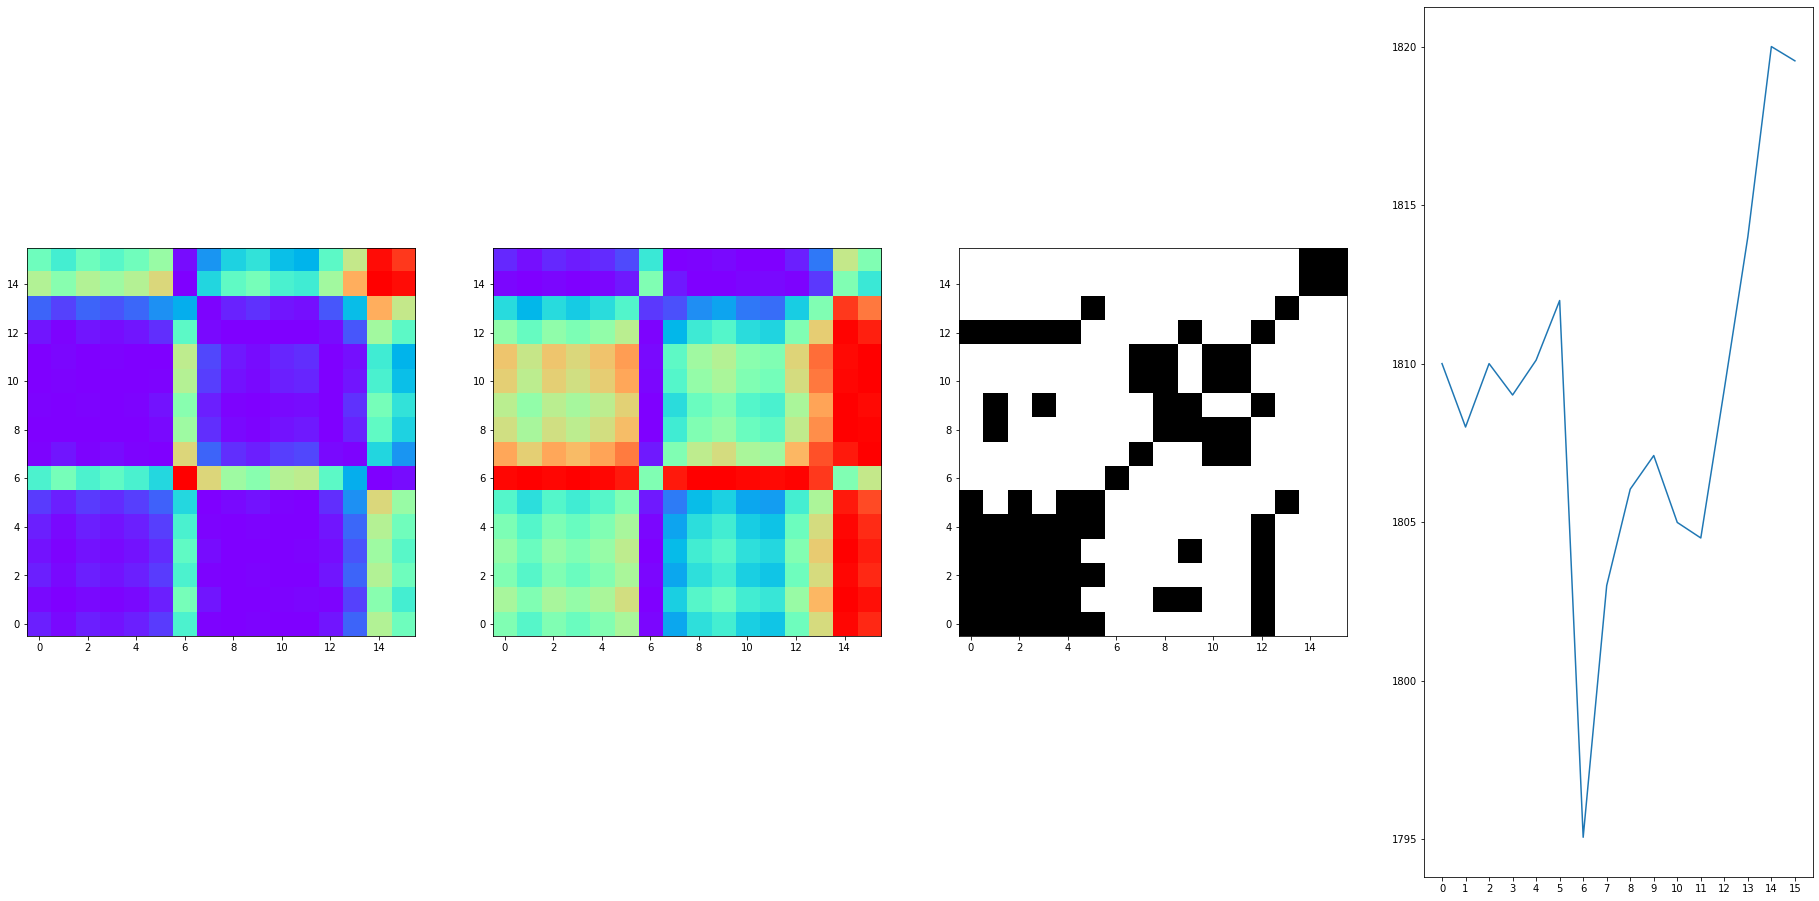

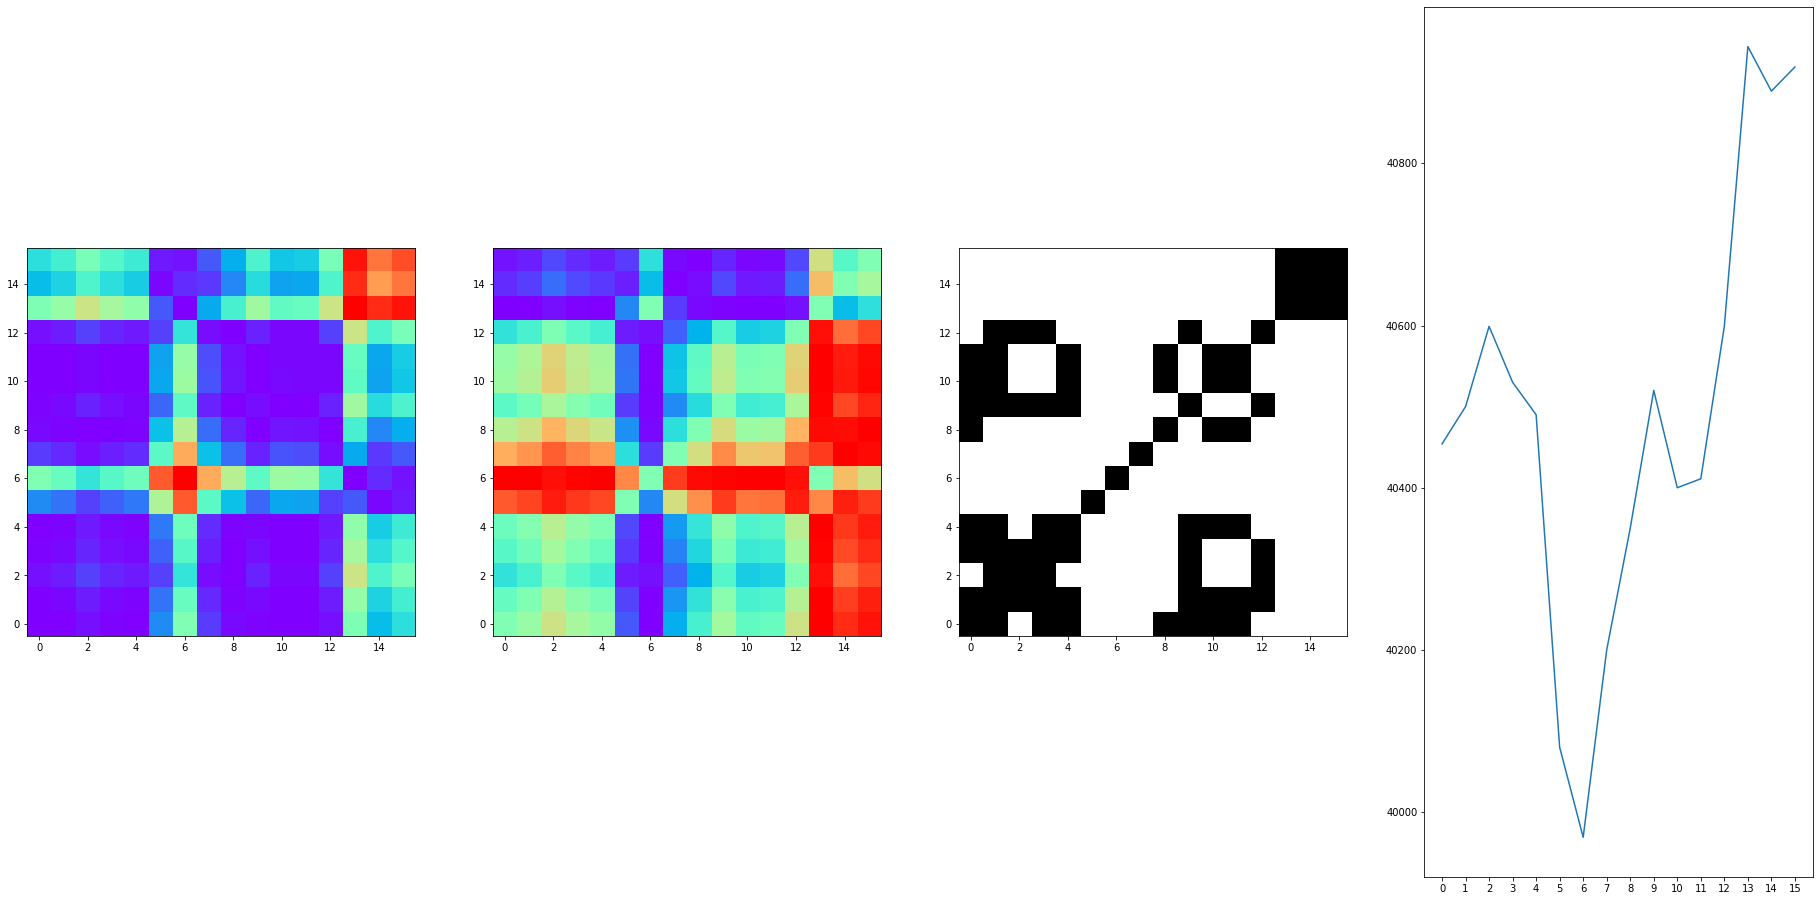

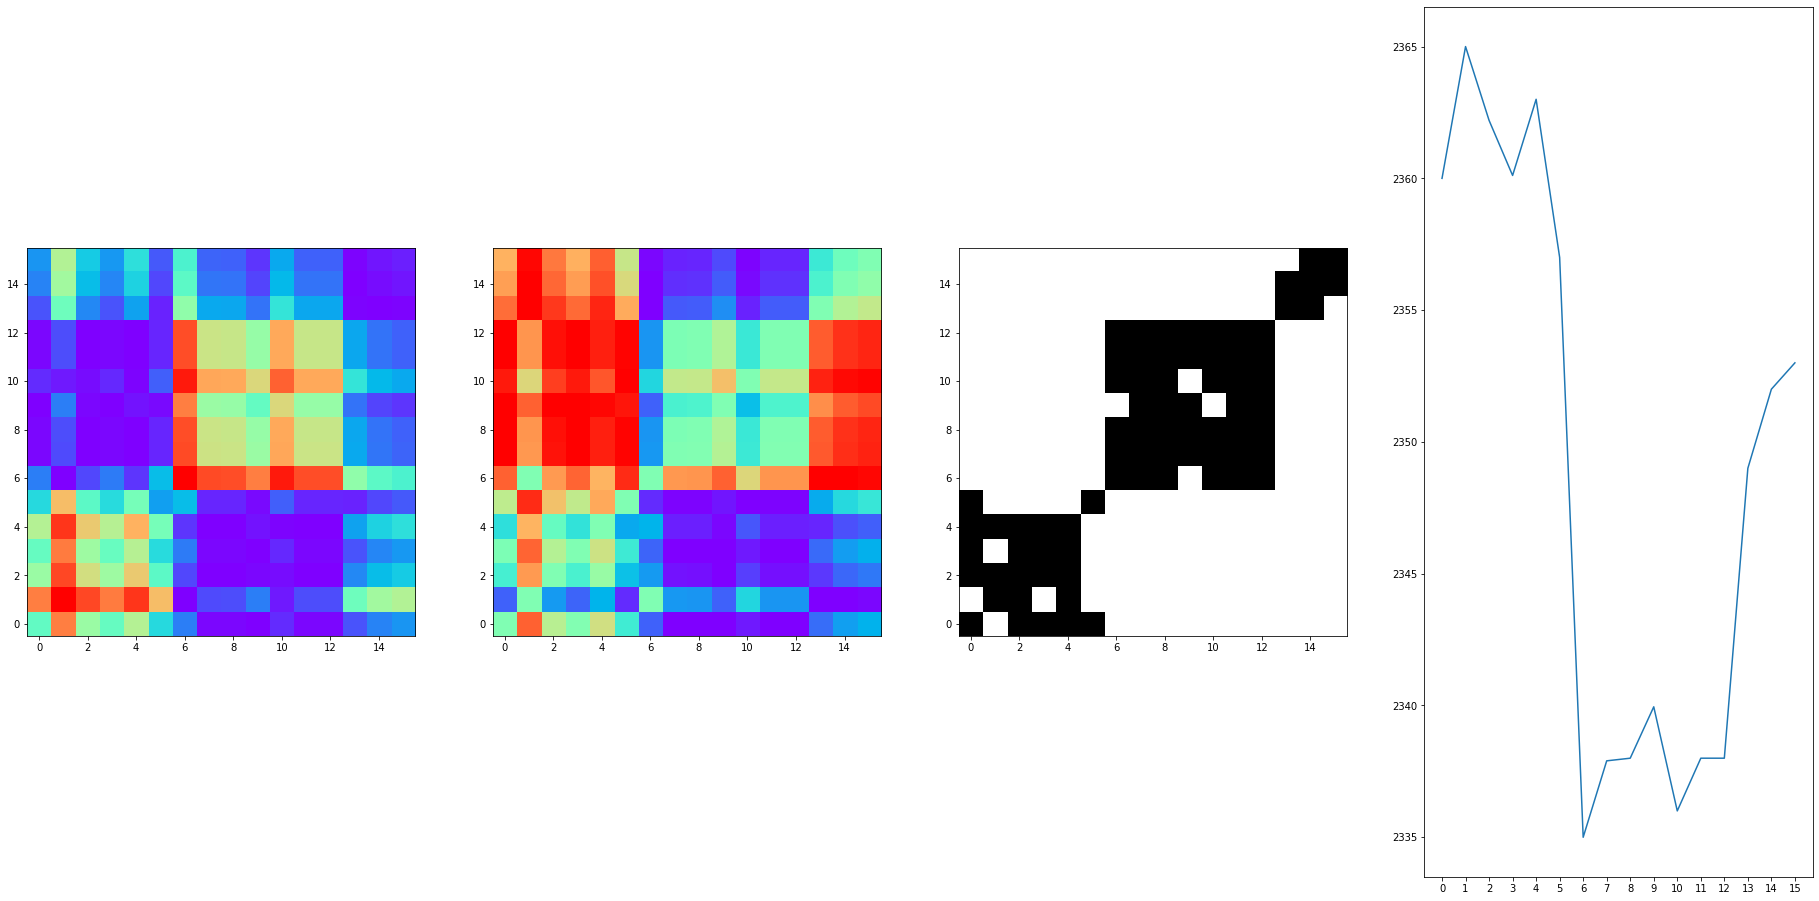

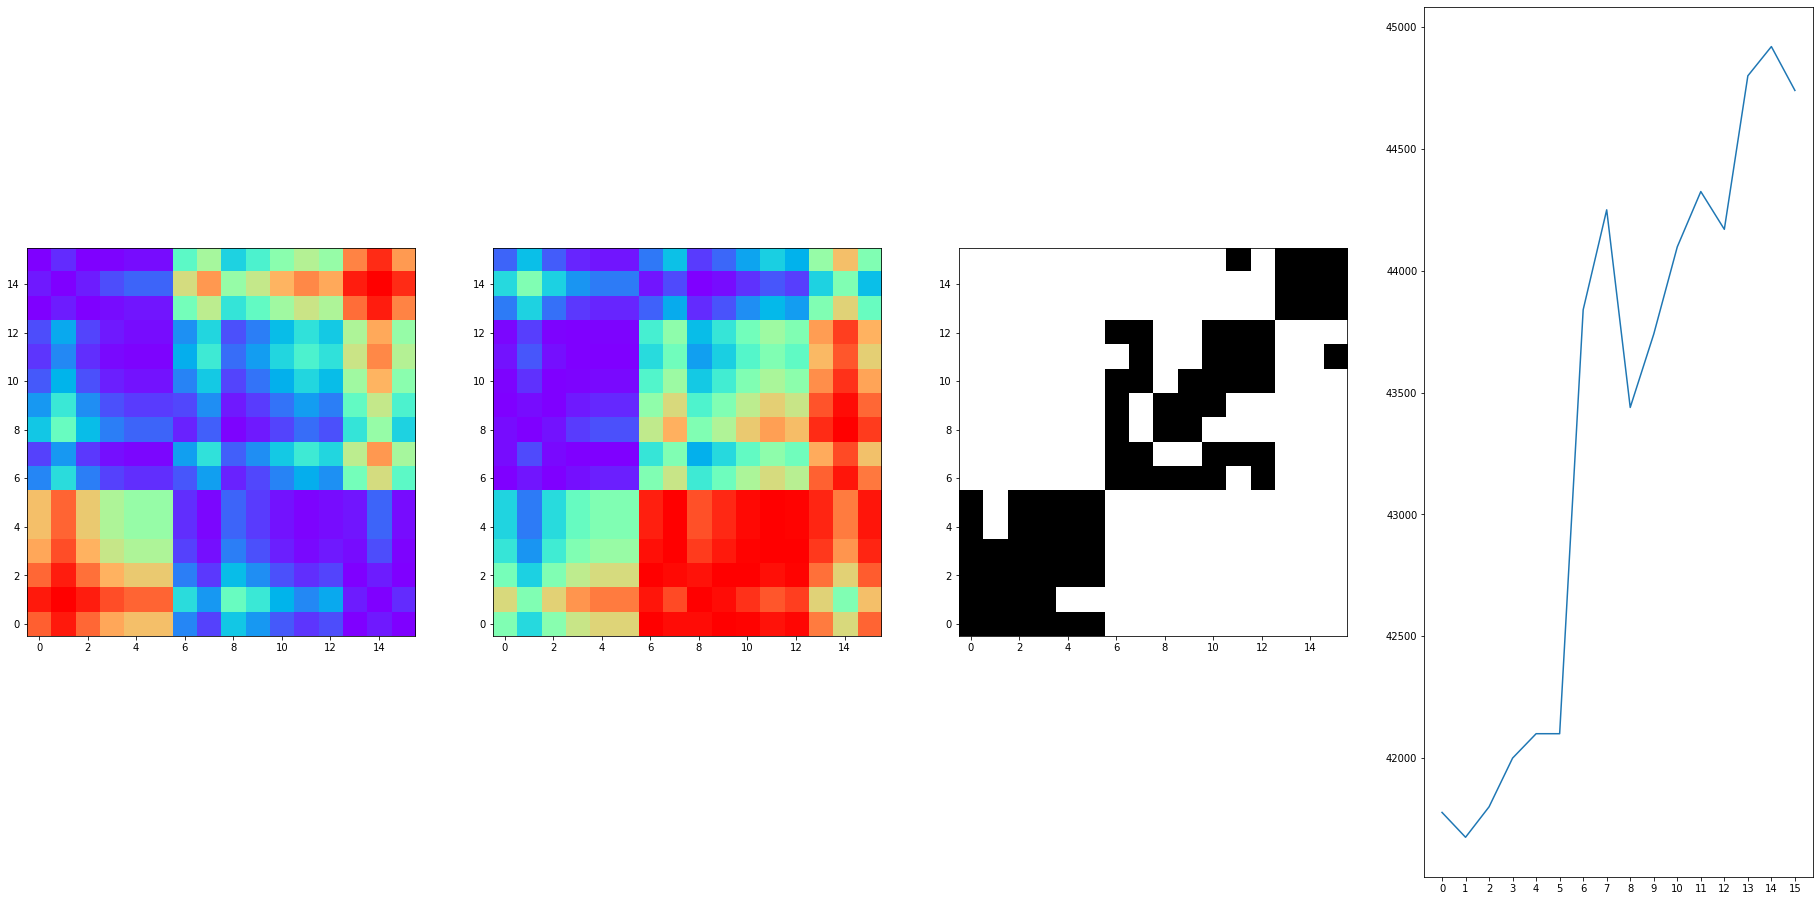

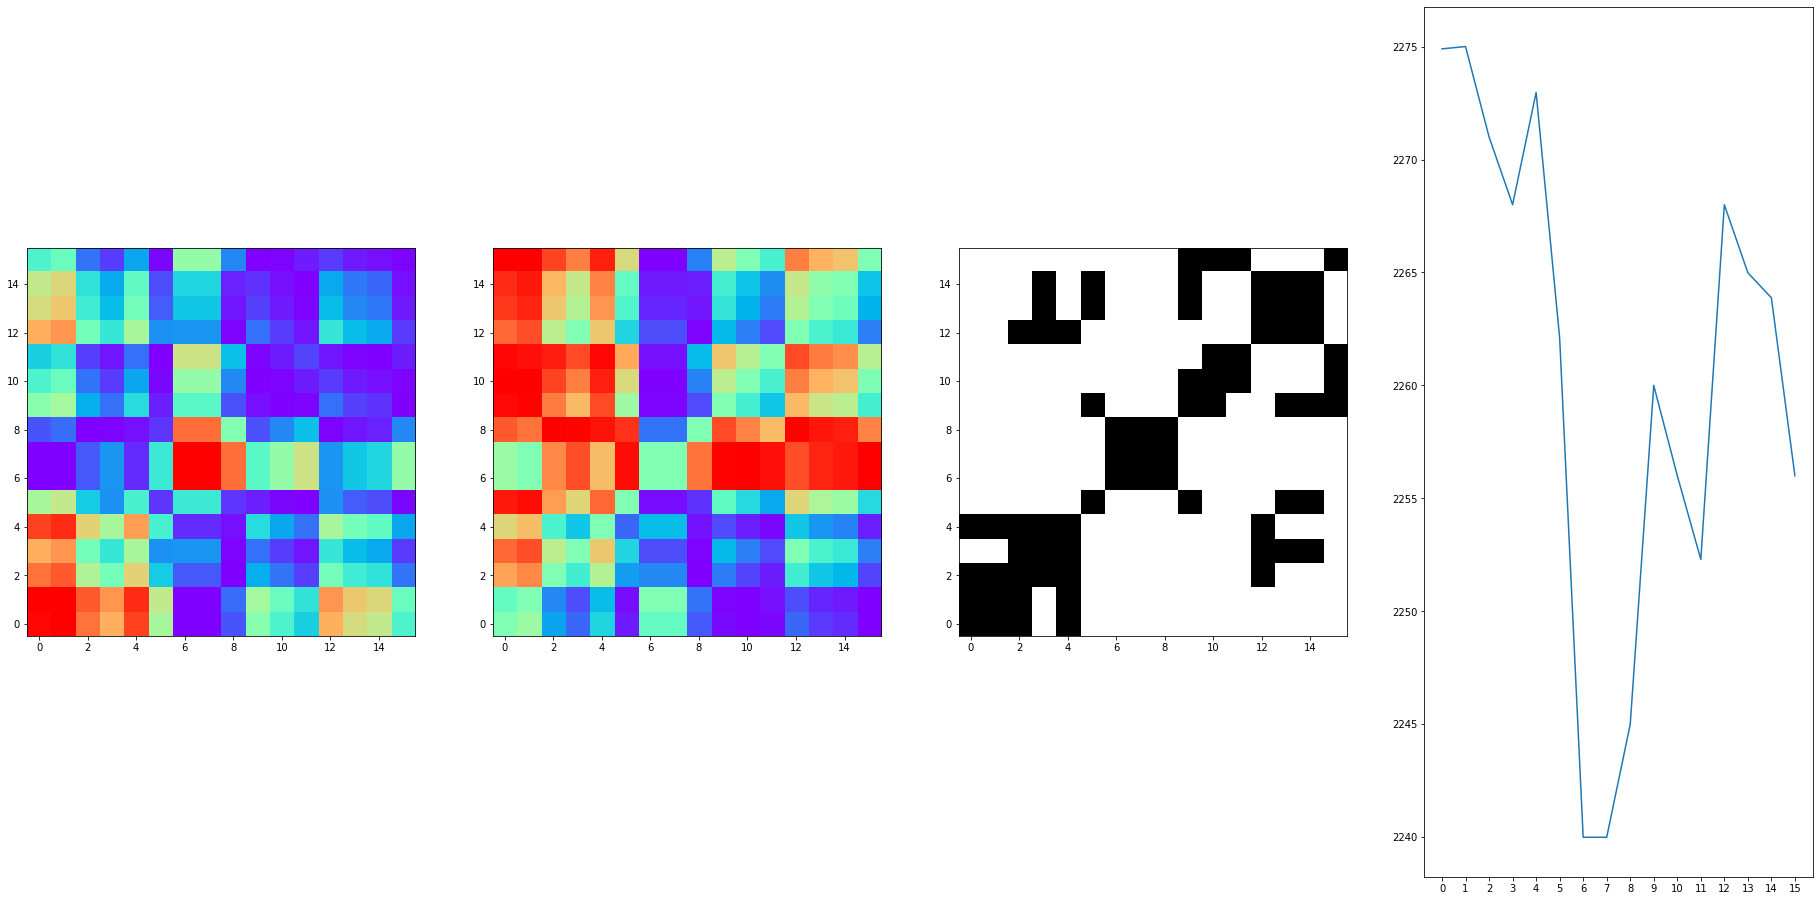

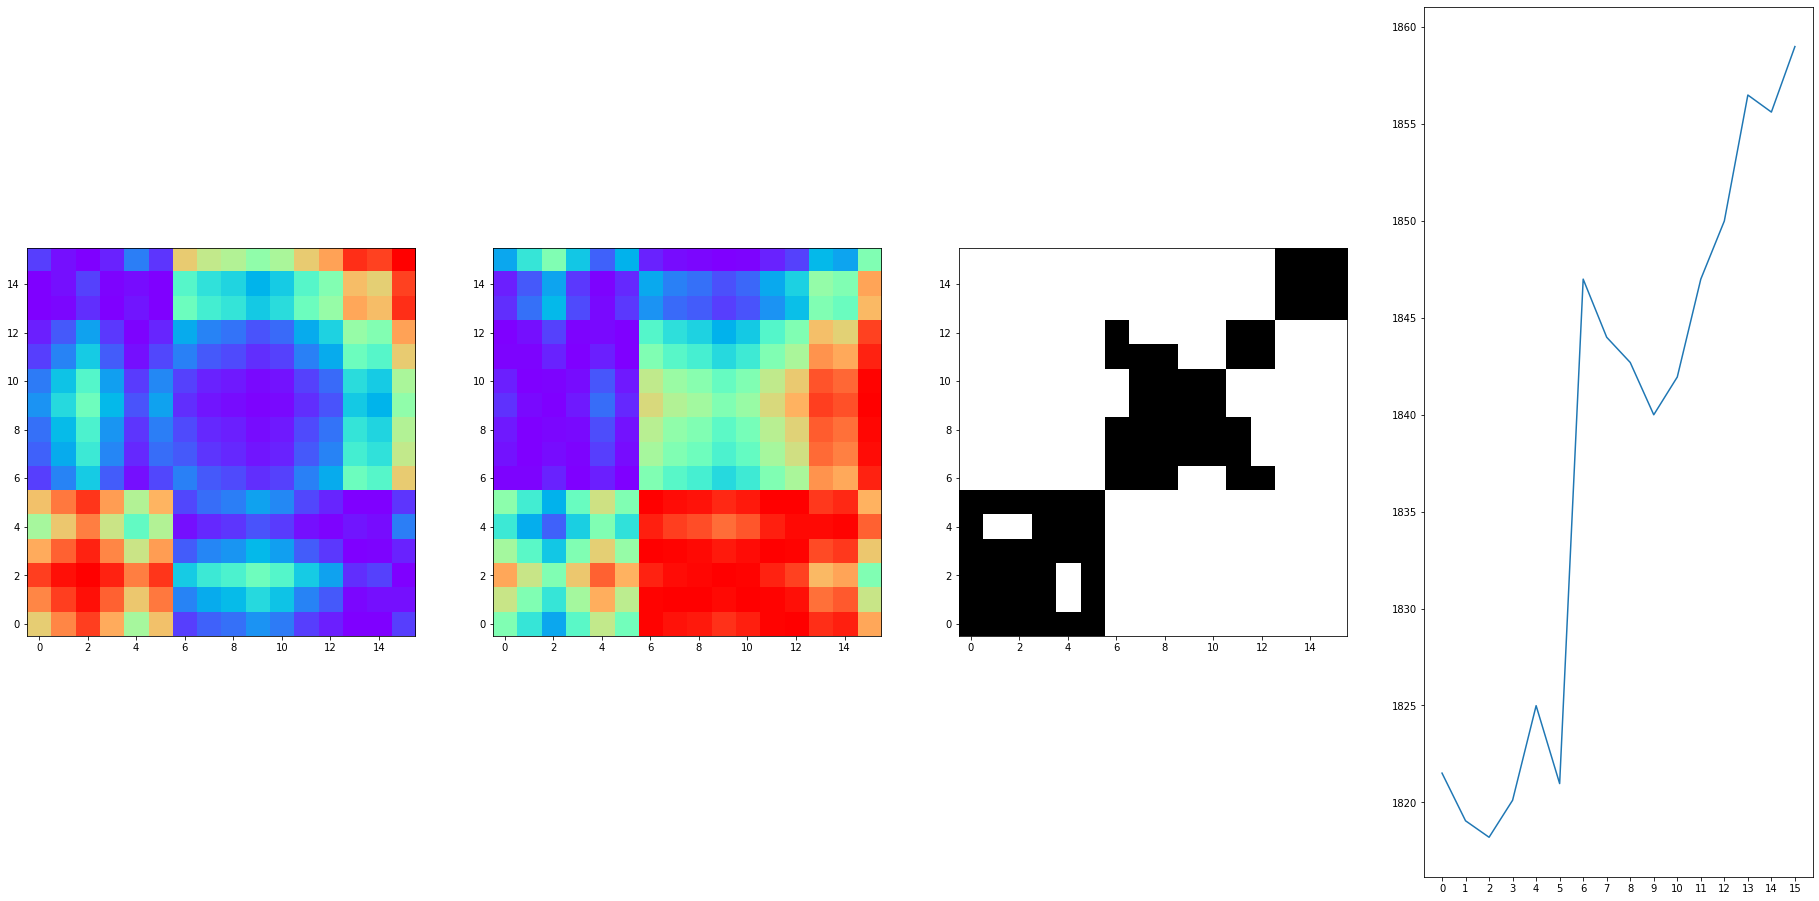

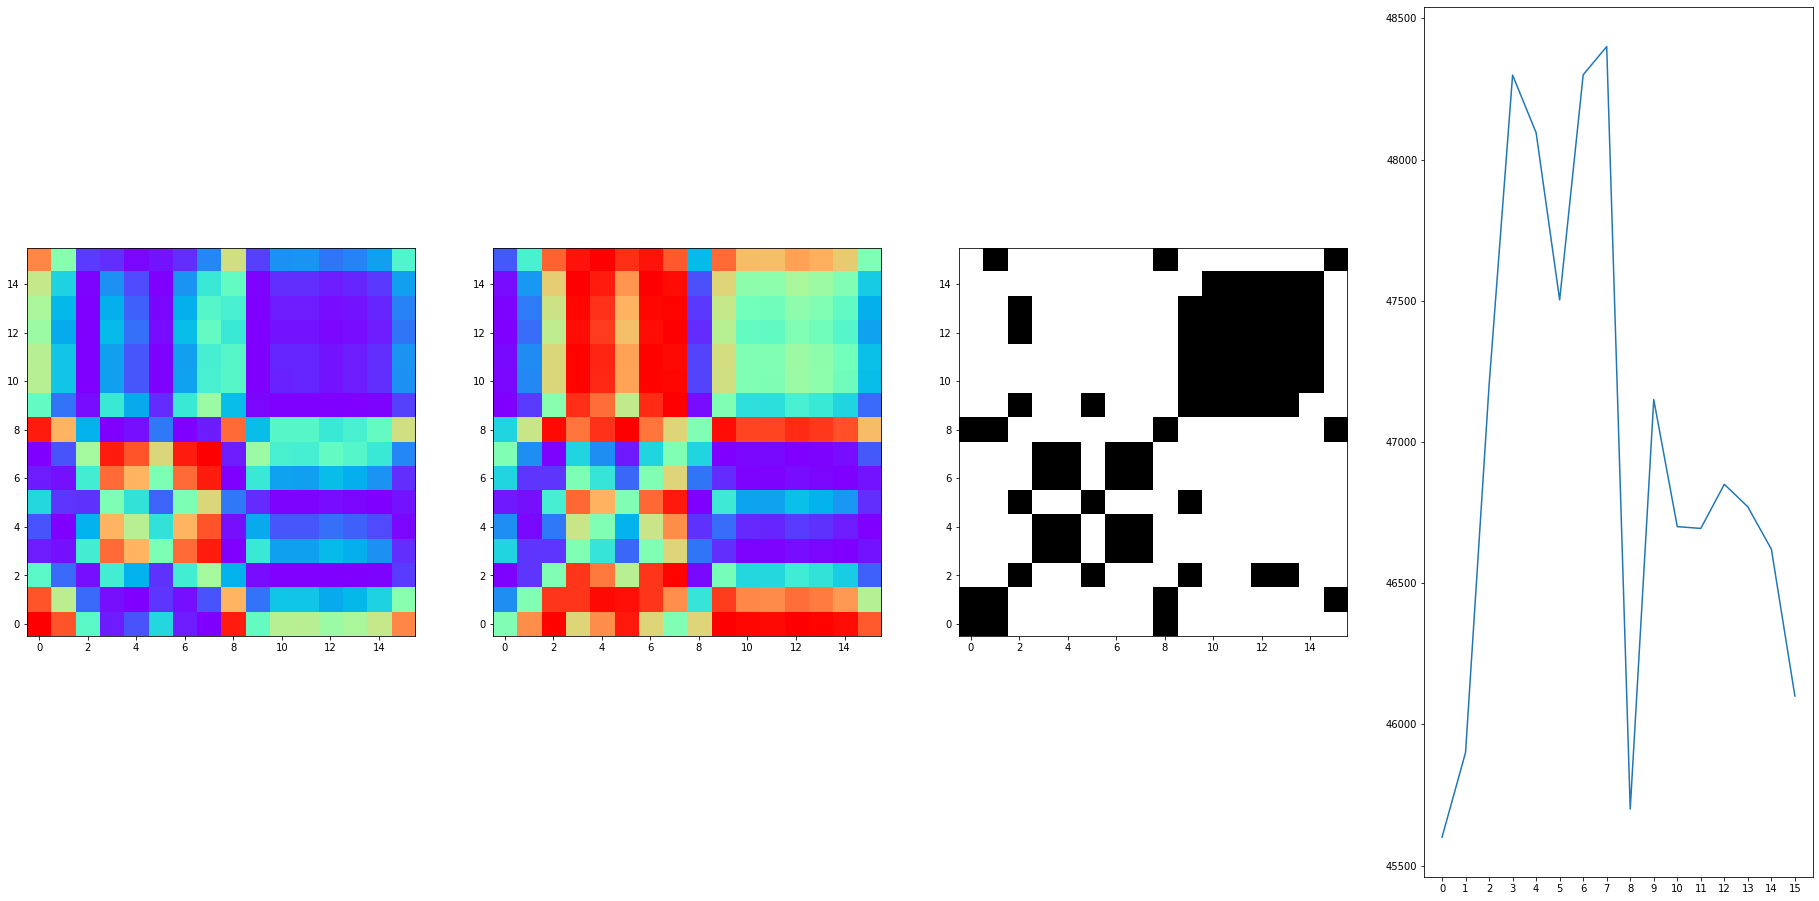

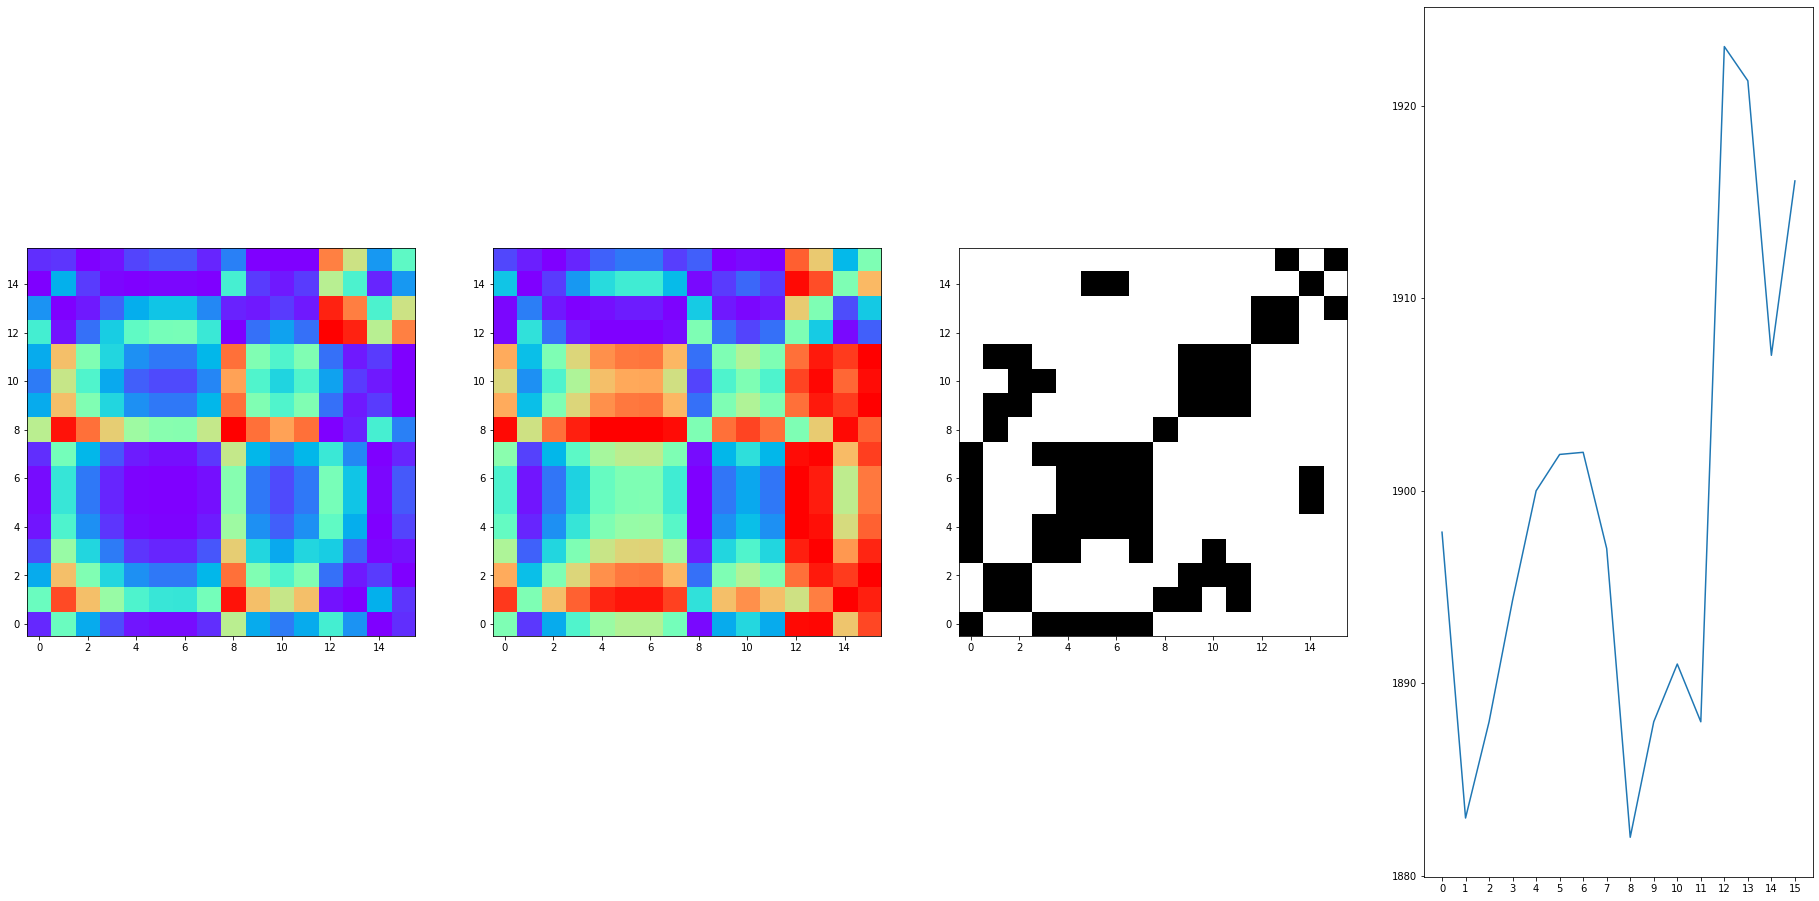

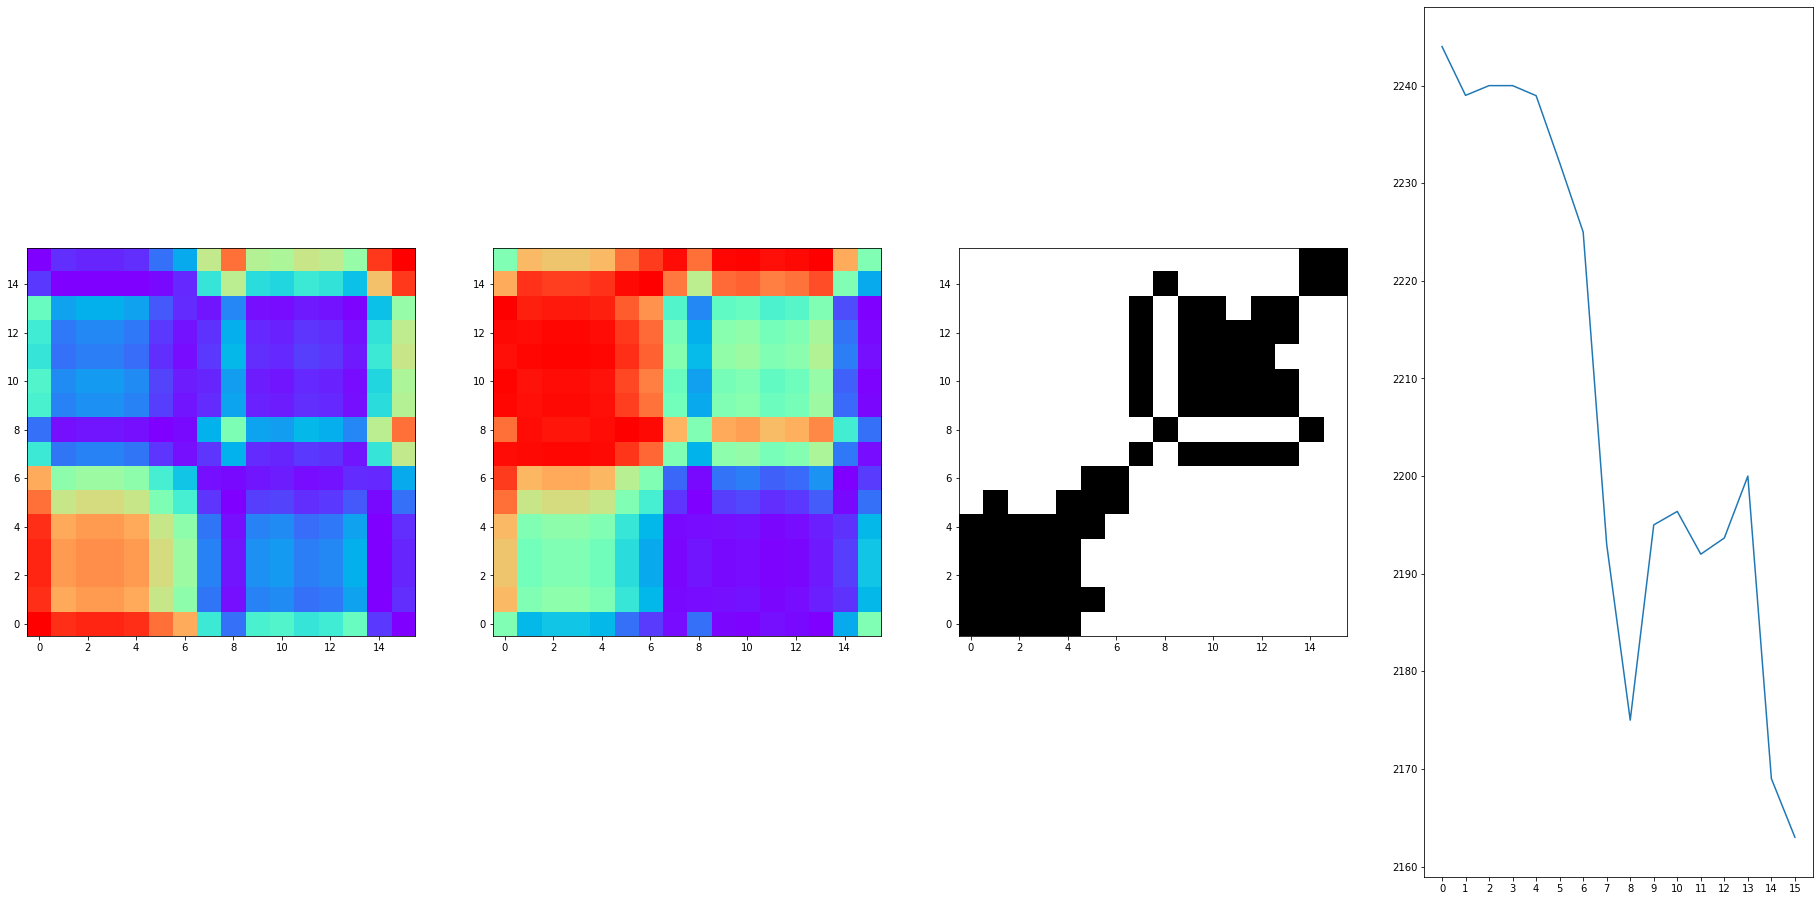

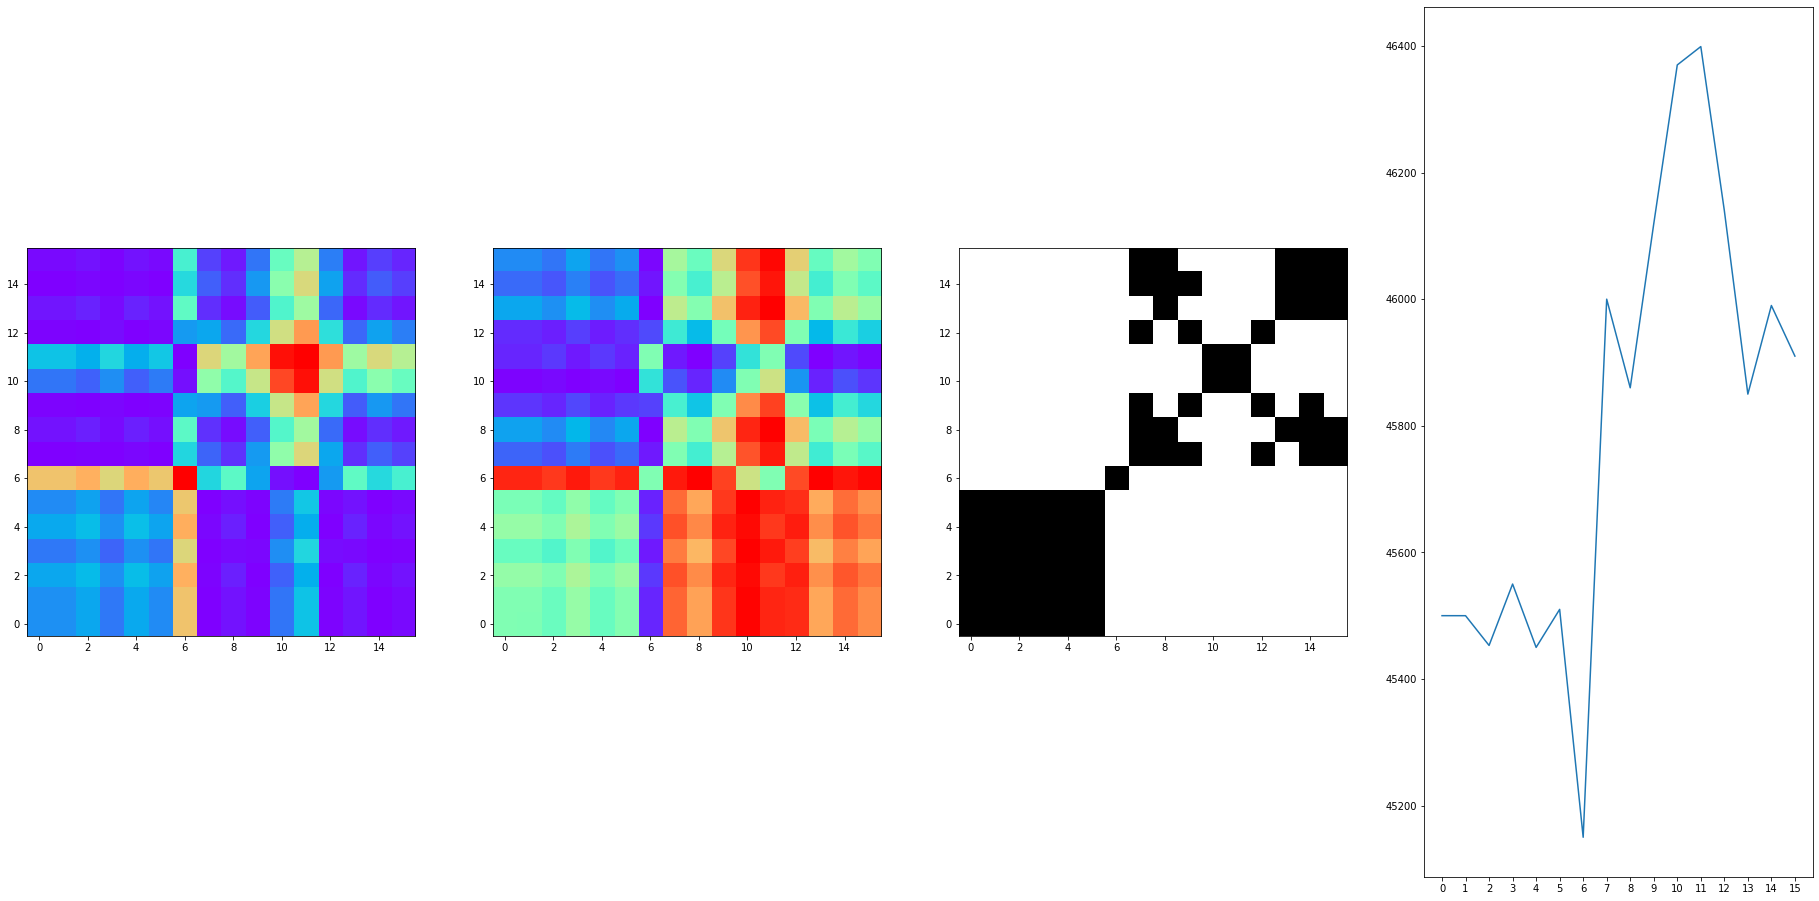

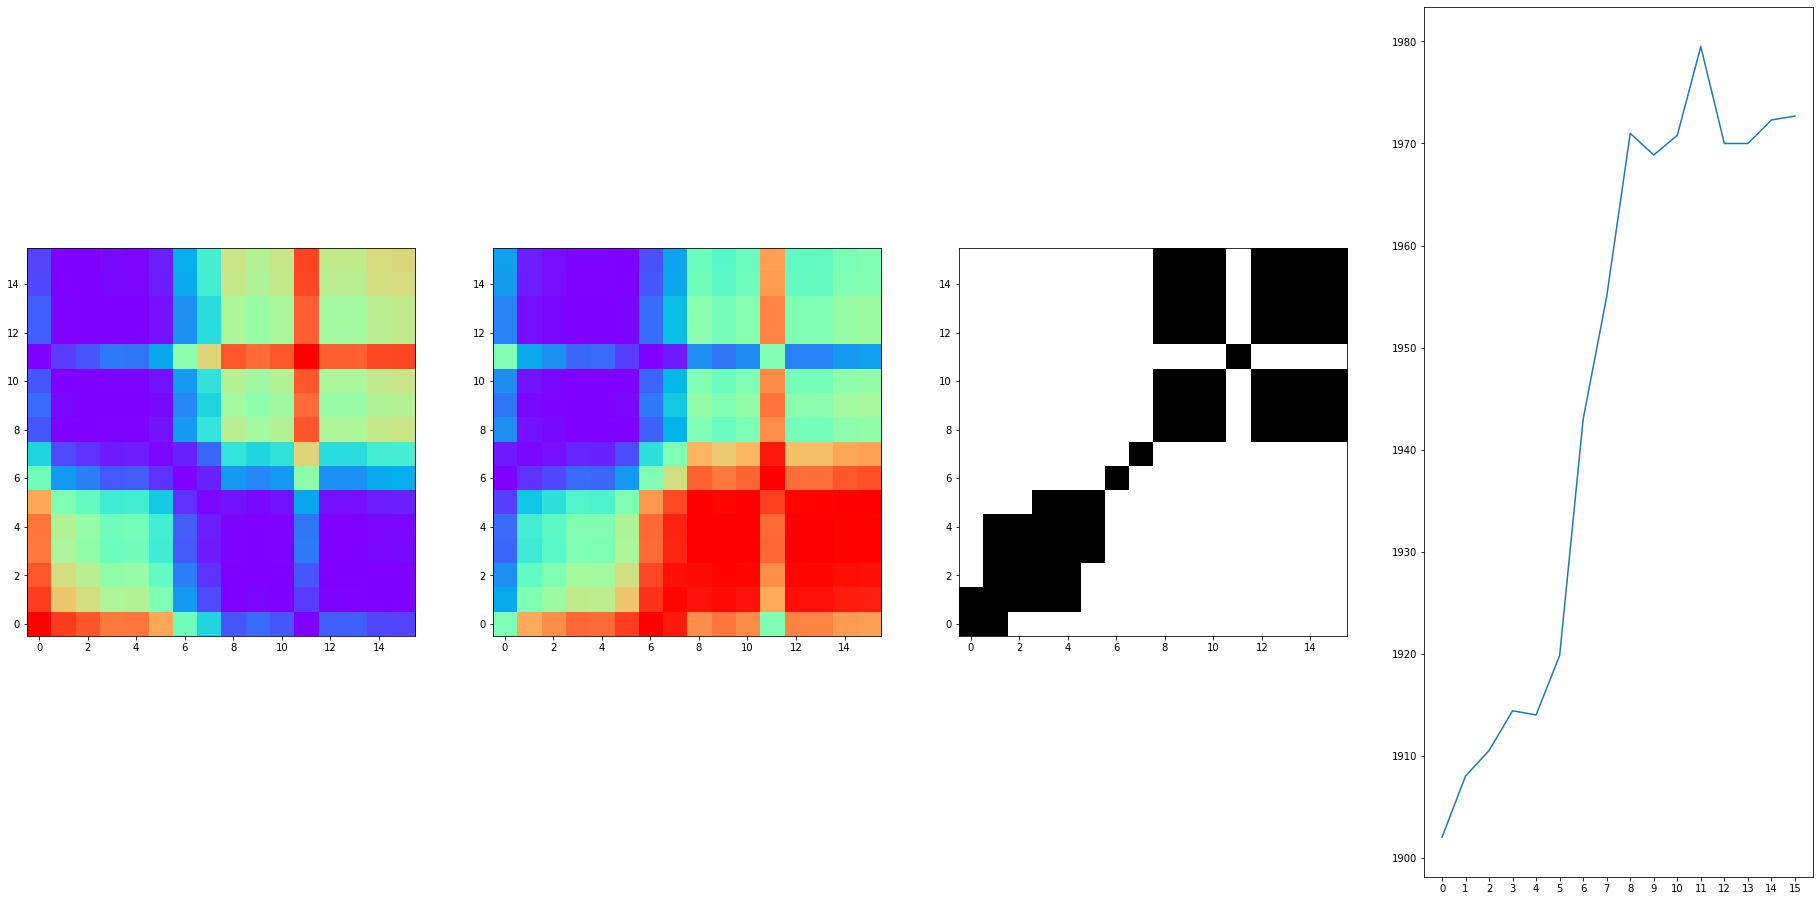

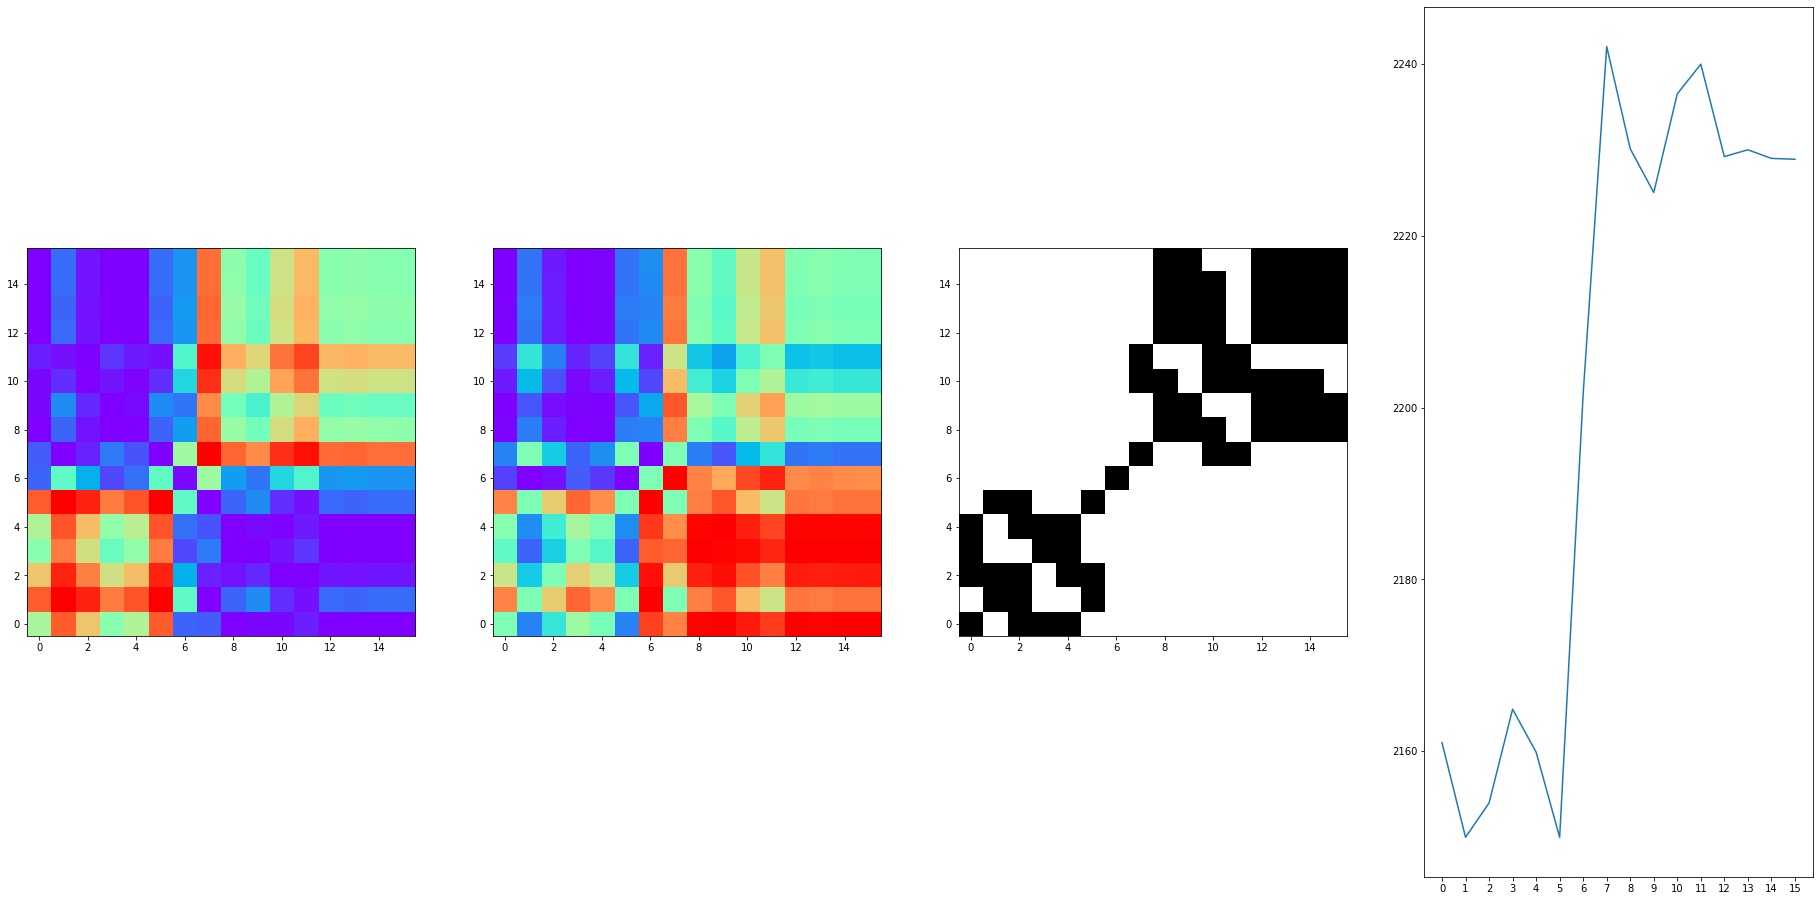

In [128]:
# Show the images for the first time series ПОРИСУЕМ ИЗ X_gasf

for i in range(0,12,1):
    fig, axes = plt.subplots(ncols=4, figsize = (32,16))
    axes[0].imshow(X_gasf[i], cmap='rainbow', origin='lower')
    axes[1].imshow(X_gadf[i], cmap='rainbow', origin='lower')
    axes[2].imshow(X_rp[i],   cmap='binary',  origin='lower')
    axes[3].plot(df_merg.iloc[i,4:-1])
#    axes[4].plot(close100_n[i])
    plt.show()

In [130]:
aaa=        '([X_gadf.T, X_gasf.T, X_rp.T]).T'
xx = np.array([X_gadf.T, X_gasf.T, X_rp.T]).T
xx.shape

(17772, 16, 16, 3)

In [114]:
aaa

'([X_gadf.T]).T'

In [116]:
#проверочка
#(X_rp - xx[:,:,:,2]).sum()

In [109]:
#какой лейбл хотим?
label = 'return_pm'
#or
# df_merg['label_2'] = np.where(df_merg['return']>0.5,1, np.where(df_merg['return']<-0.5,-1,0))
# label = 'label_2'
# display(np.unique(df_merg['label_2'], return_counts=True))

In [117]:
#reshape ato crying
#X_gadf = np.reshape(X_gadf, (len(X_gadf),16,16,1))


#границы
tr_n = int(len(X)*0.75)
te_n = int(len(X)*0.85)

X_train, Y_train, X_test, Y_test, X_cv, Y_cv = xx[0:tr_n],        df_merg[label].iloc[0:tr_n], \
                                               xx[te_n:],         df_merg[label].iloc[te_n:],\
                                               xx[tr_n:te_n],     df_merg[label].iloc[tr_n:te_n]

Pr_train, Pr_test, Pr_cv = df_merg['return'].iloc[0:tr_n],df_merg['return'].iloc[te_n:],df_merg['return'].iloc[tr_n:te_n]

display(X_train.shape)
display(Y_train.shape)
display(X_test.shape)
display(Y_test.shape)
display(X_cv.shape)
display(Y_cv.shape)
display(Pr_train.shape)
display(Pr_test.shape)
display(Pr_cv.shape)

(13329, 16, 16, 1)

(13329,)

(2666, 16, 16, 1)

(2666,)

(1777, 16, 16, 1)

(1777,)

(13329,)

(2666,)

(1777,)

In [58]:
#Notmalization
# X_train = X_train.astype('float32')
# X_test  = X_test. astype('float32')
# X_cv  = X_cv. astype('float32')
# X_train /= 255
# X_test  /= 255
# X_cv    /= 255

In [111]:
#Kategory
Y_train = np_utils.to_categorical(Y_train,2)
Y_test  = np_utils.to_categorical(Y_test,2)
Y_cv  =   np_utils.to_categorical(Y_cv,2)

In [112]:
display('X_train, Y_train, X_test, Y_test, X_cv, Y_cv, Pr_train, Pr_test, Pr_cv')

'X_train, Y_train, X_test, Y_test, X_cv, Y_cv, Pr_train, Pr_test, Pr_cv'

In [52]:
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(1, 1), padding='valid', input_shape=(n,n,1),
#                  activation='relu',data_format="channels_last")) # (2)
# model.add(Conv2D(filters=32, kernel_size=(5, 5),
#                  activation='relu',data_format="channels_last")) # (3)
# model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last')) # (4)
# model.add(Dropout(0.25)) # Добавим слой регуляризации 
# model.add(Conv2D(64, (3, 3), padding='valid', activation='relu',data_format="channels_last")) # (5)
# model.add(Conv2D(64, (3, 3), activation='relu',data_format="channels_last")) # (6)
# model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last')) # (7)
# model.add(Dropout(0.25)) # Добавим слой регуляризации 
# model.add(Flatten())
# model.add(Dense(512, activation='relu')) # (8)
# model.add(Dropout(0.5)) # Добавим слой регуляризации 
# model.add(Dense(2, activation='softmax')) # (9)

In [53]:
# %%time
# #Compile
# model.compile(loss = 'categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# #Fit
# model.fit(X_train, Y_train, batch_size=32, nb_epoch = 25000, validation_split=0.1, shuffle=True)

C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.



Train on 2250 samples, validate on 250 samples
Epoch 1/25000
2250/2250 [==============================] - 3s 1ms/step - loss: 0.6935 - accuracy: 0.5027 - val_loss: 0.6944 - val_accuracy: 0.4600
Epoch 2/25000
2250/2250 [==============================] - 3s 1ms/step - loss: 0.6931 - accuracy: 0.5147 - val_loss: 0.6949 - val_accuracy: 0.4600
Epoch 3/25000
2250/2250 [==============================] - 3s 1ms/step - loss: 0.6929 - accuracy: 0.5098 - val_loss: 0.6954 - val_accuracy: 0.4600
Epoch 4/25000
2250/2250 [==============================] - 3s 1ms/step - loss: 0.6937 - accuracy: 0.5151 - val_loss: 0.6955 - val_accuracy: 0.4600
Epoch 5/25000
2250/2250 [==============================] - 3s 1ms/step - loss: 0.6928 - accuracy: 0.5076 - val_loss: 0.6953 - val_accuracy: 0.4600
Epoch 6/25000
2250/2250 [==============================] - 3s 1ms/step - loss: 0.6931 - accuracy: 0.5164 - val_loss: 0.6955 - val_accuracy: 0.4600
Epoch 7/25000
2250/2250 [==============================] - 3s 1ms/step

KeyboardInterrupt: 